# Задание 2.
Используя набор данных на листе «Training» (см. **Задания_1_2.xlsx**)   в качестве обучающей выборки, предсказать значения целевой переменной Target для набора данных на листе «Validate». Пояснить выбор метода. Привести оценки точности и качества предиктивной модели. Построить ROC-кривую. Назвать три наиболее важных предиктора.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image, HTML
import numba
import seaborn as sns
import sklearn.datasets, sklearn.neighbors, sklearn.tree, sklearn.neural_network, sklearn.model_selection, \
       sklearn.preprocessing, sklearn.decomposition, \
       sklearn.linear_model, sklearn.pipeline, sklearn.metrics, sklearn.impute
import sklearn_pandas
import pydotplus

%pylab inline
pylab.rcParams['figure.figsize'] = (18, 5)
pd.set_option('display.max_rows', 1100)
pd.set_option('display.max_columns', 30)

np.random.seed(33)

Populating the interactive namespace from numpy and matplotlib


## Read training data

,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
Ind,,,,,,,,,,,,,,,,,,,,,
1,1,0.0,22,28,-0.580,0,0,0,0.300,24,1.010,30,21,0,10,0.399,1,24,0.800,2.400,248
2,0,0.0,21,0,9.562,0,0,0,0.462,24,12.546,26,30,13,4,0.689,0,8,0.923,0.000,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,0,10.0,21,0,19.730,1,0,1,0.266,5,3.836,30,28,9,0,0.249,0,0,0.800,0.000,433
10000,1,0.0,0,28,-32.686,0,0,0,0.616,24,-24.908,23,30,29,21,0.718,0,7,0.043,1.143,0


,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9817.000000,10000.00000,10000.000000,9723.000000,9488.000000,10000.000000
mean,0.500000,14.941011,18.097100,15.074600,-4.536355,0.485100,0.003700,1.209000,0.428276,12.753300,-8.160087,27.565100,24.659900,13.650800,16.430700,0.505650,0.11540,1.542000,0.783979,1.023596,630.258100
std,0.500025,26.387400,7.105471,10.584216,21.537098,0.499803,0.060718,1.115188,0.270853,8.079491,21.726863,4.782243,7.092042,14.941405,10.835753,0.231351,0.31952,4.518371,0.324464,1.769253,964.770629
min,0.000000,0.000000,0.000000,0.000000,-386.955000,0.000000,0.000000,0.000000,0.031000,1.000000,-363.272000,1.000000,1.000000,0.000000,0.000000,0.042000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.895000,16.000000,3.000000,-8.647000,0.000000,0.000000,1.000000,0.194000,6.000000,-12.581500,27.000000,22.000000,5.000000,6.000000,0.314000,0.00000,0.000000,0.800000,0.400000,16.000000
50%,0.500000,10.000000,22.000000,18.000000,-1.056000,0.000000,0.000000,1.000000,0.360000,11.000000,-4.088500,30.000000,28.000000,10.000000,18.000000,0.574000,0.00000,0.000000,0.800000,0.800000,153.000000
75%,1.000000,20.000000,23.000000,24.000000,2.861500,1.000000,0.000000,2.000000,0.667000,22.000000,0.278500,30.000000,30.000000,17.000000,27.000000,0.705000,0.00000,0.000000,0.800000,1.000000,970.000000
max,1.000000,1500.000000,23.000000,28.000000,936.833000,1.000000,1.000000,17.000000,0.981000,24.000000,949.837000,30.000000,31.000000,300.000000,30.000000,0.923000,1.00000,24.000000,14.000000,24.000000,6996.000000
nunique,2.000000,1669.000000,24.000000,29.000000,8455.000000,2.000000,2.000000,15.000000,878.000000,24.000000,8502.000000,30.000000,31.000000,125.000000,31.000000,801.000000,2.00000,25.000000,349.000000,430.000000,2302.000000


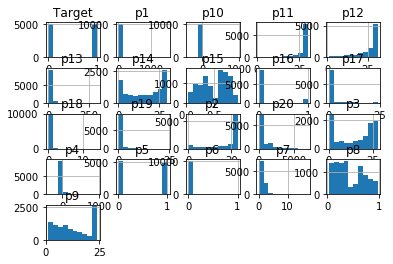

In [2]:
original_training_data = pd.read_excel('../inputs/Задания_1_2.xlsx', sheet_name='Training', index_col='Ind')
descr = original_training_data.describe()
descr.loc['nunique'] = original_training_data.nunique()

with pd.option_context('display.max_rows', 5):
    display(original_training_data)
    
display(descr)
original_training_data.hist();

In [3]:
col_types = [
    ('Target', 'b', '|_|'),
    ('p1',     'f', '|__'),
    ('p2',     'i', '__|'),
    ('p3',     'i', '|_/'),
    ('p4',     'f', '_|_'),
    ('p5',     'b', '|_|'),
    ('p6',     'b', '|__'),
    ('p7',     'i', '\__'),
    ('p8',     'f', 'A_A'),
    ('p9',     'i', '\\|'),
    ('p10',    'f', '_|_'),
    ('p11',    'i', '__|'),
    ('p12',    'i', '__|'),
    ('p13',    'i', '|__'),
    ('p14',    'i', '\_/'),
    ('p15',    'f', 'A_A'),
    ('p16',    'b', '|__'),
    ('p17',    'i', '|__'),
    ('p18',    'f', '|__'),
    ('p19',    'f', '|__'),
    ('p20',    'f', '|__'),
]

- p1 - float, 0..1500, max-mean >> mean-min
- p2, p3, p7, p13, p14, p17, p20 - int, 0.., (..23, ..28, ..17, ..300, ..30, ..24, ..6996)
- p4, p10 - float, -/+
- p5, p6, p16 - int, 0/1, (mean ~0.5, ~0.004, ~0.11)
- p8, *p15* - float, 0..1
- p9, p11, p12 - int, >= 1, (..24, ..30, ..31)
- *p18*, *p19* - float, 0.., (..14, ..24), lots of 0.800?

There are gaps in data for p15, p18, p19 in the training set.

## Read data to predict

,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
count,0.0,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4910.000000,5000.000000,5000.000000,4845.000000,4755.000000,5000.000000
mean,NaN,16.289620,19.73280,12.683800,-4.565050,0.551000,0.00100,1.21960,0.339347,12.18300,-7.907650,28.296000,25.86420,14.798600,15.367800,0.425230,0.098400,1.220400,0.806808,0.905918,808.651600
std,NaN,26.979379,5.66673,10.090995,75.379567,0.497442,0.03161,1.03111,0.248153,7.81146,21.157392,4.059714,6.08243,16.920677,11.331187,0.222441,0.297885,4.013458,0.489396,1.580980,1069.311869
min,NaN,0.000000,0.00000,0.000000,-4952.961000,0.000000,0.00000,0.00000,0.030000,1.00000,-533.405000,0.000000,1.00000,0.000000,0.000000,0.041000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,4.355000,19.00000,0.000000,-7.970500,0.000000,0.00000,1.00000,0.140000,5.00000,-12.721750,29.000000,24.00000,6.000000,3.000000,0.237000,0.000000,0.000000,0.800000,0.000000,37.000000
50%,NaN,10.000000,23.00000,14.000000,-0.249500,1.000000,0.00000,1.00000,0.269000,11.00000,-3.584000,30.000000,29.00000,10.000000,17.000000,0.385000,0.000000,0.000000,0.800000,0.800000,285.000000
75%,NaN,20.000000,23.00000,24.000000,4.271750,1.000000,0.00000,2.00000,0.452000,20.00000,0.853250,30.000000,30.00000,18.000000,27.000000,0.631000,0.000000,0.000000,0.800000,0.950000,1413.000000
max,NaN,1000.000000,23.00000,28.000000,205.845000,1.000000,1.00000,12.00000,0.980000,24.00000,209.631000,30.000000,31.00000,309.000000,30.000000,0.918000,1.000000,24.000000,24.000000,24.000000,6495.000000


,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
Ind,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.0,12,3,1.143,0,0,1,0.236,12,-1.854,30,23,4,12,0.448,0,0,0.800,0.250,429
2,NaN,7.0,12,10,1.949,1,0,1,0.630,15,-1.645,29,10,7,16,0.600,0,0,0.828,0.562,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,NaN,3.0,21,0,0.235,1,0,1,0.101,21,0.843,30,29,4,1,0.229,0,0,0.800,0.000,1709
5000,NaN,2.0,21,0,2.622,1,0,1,0.206,6,0.541,30,28,4,2,0.427,0,0,0.800,0.000,1475


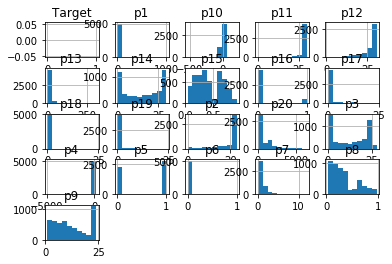

In [4]:
original_predict_data = pd.read_excel('../inputs/Задания_1_2.xlsx', sheet_name='Validate', index_col='Ind')

display(original_predict_data.describe())
with pd.option_context('display.max_rows', 5):
    display(original_predict_data)
    
original_predict_data.hist();

# Compare train and predict data sets

In [5]:
def compare_data_sets(train, predict):
    training_data_range = train.describe()
    predict_data_range = predict.describe()
    predict_min_in_range = predict_data_range.loc[['min']] >= training_data_range.loc[['min']]
    predict_max_in_range = predict_data_range.loc['max':'max'] <= training_data_range.loc['max':'max']
    training_data_range.rename(inplace=True, index=lambda row: 'train ' + row)
    predict_data_range.rename(inplace=True, index=lambda row: 'predict ' + row)
    predict_min_in_range.rename(inplace=True, index={'min': 'within range'})
    predict_max_in_range.rename(inplace=True, index={'max': 'within range'})
    predict_in_range = predict_min_in_range & predict_max_in_range
    predict_in_range.replace(inplace=True, to_replace=False, value=np.nan)

    data_ranges = pd.DataFrame(columns=predict.columns)
    data_ranges = data_ranges.append(training_data_range.loc['train min':'train min'])
    data_ranges = data_ranges.append(predict_data_range.loc['predict min':'predict min'])
    data_ranges = data_ranges.append(predict_in_range)
    data_ranges = data_ranges.append(predict_data_range.loc['predict max':'predict max'])
    data_ranges = data_ranges.append(training_data_range.loc['train max':'train max'])
    data_ranges = data_ranges.append(training_data_range.loc['train count':'train count'])
    data_ranges = data_ranges.append(predict_data_range.loc['predict count':'predict count'])
    data_ranges = data_ranges.append(training_data_range.loc['train mean':'train mean'])
    data_ranges = data_ranges.append(predict_data_range.loc['predict mean':'predict mean'])
    data_ranges = data_ranges.append(training_data_range.loc['train std':'train std'])
    data_ranges = data_ranges.append(predict_data_range.loc['predict std':'predict std'])
    display(data_ranges)

compare_data_sets(original_training_data, original_predict_data)

,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
train min,0.000000,0.000000,0.000000,0.000000,-386.955000,0.000000,0.000000,0.000000,0.031000,1.000000,-363.272000,1.000000,1.000000,0.000000,0.000000,0.042000,0.000000,0.000000,0.000000,0.000000,0.000000
predict min,NaN,0.000000,0.000000,0.000000,-4952.961000,0.000000,0.000000,0.000000,0.030000,1.000000,-533.405000,0.000000,1.000000,0.000000,0.000000,0.041000,0.000000,0.000000,0.000000,0.000000,0.000000
within range,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000
predict max,NaN,1000.000000,23.000000,28.000000,205.845000,1.000000,1.000000,12.000000,0.980000,24.000000,209.631000,30.000000,31.000000,309.000000,30.000000,0.918000,1.000000,24.000000,24.000000,24.000000,6495.000000
train max,1.000000,1500.000000,23.000000,28.000000,936.833000,1.000000,1.000000,17.000000,0.981000,24.000000,949.837000,30.000000,31.000000,300.000000,30.000000,0.923000,1.000000,24.000000,14.000000,24.000000,6996.000000
train count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9817.000000,10000.000000,10000.000000,9723.000000,9488.000000,10000.000000
predict count,0.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4910.000000,5000.000000,5000.000000,4845.000000,4755.000000,5000.000000
train mean,0.500000,14.941011,18.097100,15.074600,-4.536355,0.485100,0.003700,1.209000,0.428276,12.753300,-8.160087,27.565100,24.659900,13.650800,16.430700,0.505650,0.115400,1.542000,0.783979,1.023596,630.258100
predict mean,NaN,16.289620,19.732800,12.683800,-4.565050,0.551000,0.001000,1.219600,0.339347,12.183000,-7.907650,28.296000,25.864200,14.798600,15.367800,0.425230,0.098400,1.220400,0.806808,0.905918,808.651600
train std,0.500025,26.387400,7.105471,10.584216,21.537098,0.499803,0.060718,1.115188,0.270853,8.079491,21.726863,4.782243,7.092042,14.941405,10.835753,0.231351,0.319520,4.518371,0.324464,1.769253,964.770629


some values in the training set have ranges more narrow than in the prediction set
- p13 - train 0..300, validate 0..309
- p4 - train -387..937, validate -4952..205
- p10 - train -363..949, validate -533..209
- p18 - train 0..14, validate 0..24

,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
Target,1.000000,-0.076421,-0.293999,0.267374,-0.059479,-0.193086,0.057646,-0.019908,0.421844,0.078462,0.011119,-0.203450,-0.210458,-0.073317,0.097137,0.448771,0.085758,0.111285,-0.086469,0.083304,-0.274772
p1,-0.076421,1.000000,0.158599,0.072520,-0.019790,0.009815,0.027161,0.341031,-0.058802,-0.294255,-0.240297,0.014691,0.136725,0.445560,0.147559,-0.091737,-0.053616,-0.193254,0.048192,-0.039125,-0.024230
p2,-0.293999,0.158599,1.000000,-0.089759,0.004634,0.145677,-0.034677,0.249763,-0.563686,-0.270440,-0.098238,0.281326,0.736550,0.095555,0.042015,-0.404079,-0.299194,-0.277707,0.263636,-0.108673,0.149705
p3,0.267374,0.072520,-0.089759,1.000000,-0.436661,0.042653,0.014977,-0.107894,0.267189,0.038169,-0.381722,-0.297613,0.025377,0.223790,0.781802,0.216259,0.036608,0.031619,-0.146395,0.187712,-0.398159
p4,-0.059479,-0.019790,0.004634,-0.436661,1.000000,-0.117325,0.004112,0.125626,-0.093254,-0.177639,0.735026,0.118074,-0.076775,-0.324347,-0.405124,-0.038204,-0.019664,-0.085172,0.079296,-0.035977,0.166515
p5,-0.193086,0.009815,0.145677,0.042653,-0.117325,1.000000,-0.013013,-0.059546,-0.347316,-0.043422,-0.137516,0.327150,0.152833,0.078331,0.109556,-0.364943,-0.050604,-0.088272,0.003767,-0.037099,0.306138
p6,0.057646,0.027161,-0.034677,0.014977,0.004112,-0.013013,1.000000,0.029934,0.029024,-0.006701,-0.007161,-0.028211,-0.009387,0.006165,0.013690,0.020072,0.008919,-0.006217,0.000565,-0.008550,-0.013746
p7,-0.019908,0.341031,0.249763,-0.107894,0.125626,-0.059546,0.029934,1.000000,-0.077316,-0.638948,-0.021668,0.053669,0.172313,-0.071096,-0.050603,-0.011361,-0.168735,-0.370019,0.101769,-0.035762,0.030689
p8,0.421844,-0.058802,-0.563686,0.267189,-0.093254,-0.347316,0.029024,-0.077316,1.000000,0.154626,0.002403,-0.571081,-0.580854,-0.033357,0.177828,0.857257,0.256992,0.160824,-0.060367,0.067048,-0.452059
p9,0.078462,-0.294255,-0.270440,0.038169,-0.177639,-0.043422,-0.006701,-0.638948,0.154626,1.000000,0.038323,-0.103439,-0.173347,0.027281,0.008849,0.094935,0.222938,0.475102,-0.092092,0.016150,-0.058287


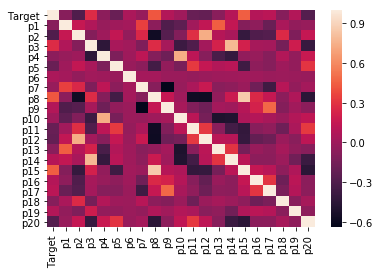

In [6]:
correlations = original_training_data.corr()
display(correlations)
sns.heatmap(correlations)

### Strong predictors might be: p15, p8, p3

# Impute missing values (p15, p18, p19)
gonna predict 'p15', because it is a good predictor and it has strong correlation with 'p8', should be easy to predict.

for 'p18', 'p19' will just fill missing values with the mean value, doesn't matter if the mean is not integer

In [7]:
np.random.seed(33)
imputer_p18 = sklearn.impute.SimpleImputer(strategy='mean')
imputer_p19 = sklearn.impute.SimpleImputer(strategy='mean')
training_data = original_training_data.copy()
training_data['p18'] = imputer_p18.fit_transform(training_data['p18'].values.reshape(-1, 1))
training_data['p19'] = imputer_p19.fit_transform(training_data['p19'].values.reshape(-1, 1))

def split_df(df, **kwargs):
    train, test = sklearn.model_selection.train_test_split(df.values, **kwargs)
    train_df = pd.DataFrame(columns=df.columns, data=train)
    test_df = pd.DataFrame(columns=df.columns, data=test)
    for col in df.columns:
        train_df[col] = train_df[col].astype(df[col].dtype)
        test_df[col] = test_df[col].astype(df[col].dtype)
    return train_df, test_df

known_p15 = training_data[~np.isnan(training_data['p15'])]
train_p15, test_p15 = split_df(known_p15)
train_p15_y = train_p15.loc[:, 'p15'].values
train_p15_x = train_p15.loc[:, [c for c in train_p15.columns if c != 'Target' and c != 'p15']].values
test_p15_y = test_p15.loc[:, 'p15'].values
test_p15_x = test_p15.loc[:, [c for c in train_p15.columns if c != 'Target' and c != 'p15']].values
classif_p15 = sklearn.tree.DecisionTreeRegressor(max_depth=5)
classif_p15.fit(train_p15_x, train_p15_y)
train_p15_y_pred = classif_p15.predict(train_p15_x)
print('p15 prediction error on train set:', ((train_p15_y_pred - train_p15_y) ** 2).mean())
test_p15_y_pred = classif_p15.predict(test_p15_x)
print('p15 prediction error on test set:', ((test_p15_y_pred - test_p15_y) ** 2).mean())

topredict_p15_x = training_data.loc[np.isnan(training_data['p15']), [c for c in train_p15.columns if c != 'Target' and c != 'p15']].values
topredict_p15_y_pred = classif_p15.predict(topredict_p15_x)
training_data.loc[np.isnan(training_data['p15']), 'p15'] = topredict_p15_y_pred


display(training_data.describe())
with pd.option_context('display.max_rows', 5):
#     display(train_p15.loc[:, [c for c in train_p15.columns if c != 'Target' and c != 'p15']])
    display(training_data)

p15 prediction error on train set: 0.009245773487991146
p15 prediction error on test set: 0.01049106044021311


,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500000,14.941011,18.097100,15.074600,-4.536355,0.485100,0.003700,1.209000,0.428276,12.753300,-8.160087,27.565100,24.659900,13.650800,16.430700,0.505571,0.11540,1.542000,0.783979,1.023596,630.258100
std,0.500025,26.387400,7.105471,10.584216,21.537098,0.499803,0.060718,1.115188,0.270853,8.079491,21.726863,4.782243,7.092042,14.941405,10.835753,0.230983,0.31952,4.518371,0.319938,1.723361,964.770629
min,0.000000,0.000000,0.000000,0.000000,-386.955000,0.000000,0.000000,0.000000,0.031000,1.000000,-363.272000,1.000000,1.000000,0.000000,0.000000,0.042000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.895000,16.000000,3.000000,-8.647000,0.000000,0.000000,1.000000,0.194000,6.000000,-12.581500,27.000000,22.000000,5.000000,6.000000,0.313000,0.00000,0.000000,0.800000,0.462000,16.000000
50%,0.500000,10.000000,22.000000,18.000000,-1.056000,0.000000,0.000000,1.000000,0.360000,11.000000,-4.088500,30.000000,28.000000,10.000000,18.000000,0.574000,0.00000,0.000000,0.800000,0.800000,153.000000
75%,1.000000,20.000000,23.000000,24.000000,2.861500,1.000000,0.000000,2.000000,0.667000,22.000000,0.278500,30.000000,30.000000,17.000000,27.000000,0.705000,0.00000,0.000000,0.800000,1.023596,970.000000
max,1.000000,1500.000000,23.000000,28.000000,936.833000,1.000000,1.000000,17.000000,0.981000,24.000000,949.837000,30.000000,31.000000,300.000000,30.000000,0.923000,1.00000,24.000000,14.000000,24.000000,6996.000000


,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
Ind,,,,,,,,,,,,,,,,,,,,,
1,1,0.0,22,28,-0.580,0,0,0,0.300,24,1.010,30,21,0,10,0.399,1,24,0.800,2.400,248
2,0,0.0,21,0,9.562,0,0,0,0.462,24,12.546,26,30,13,4,0.689,0,8,0.923,0.000,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,0,10.0,21,0,19.730,1,0,1,0.266,5,3.836,30,28,9,0,0.249,0,0,0.800,0.000,433
10000,1,0.0,0,28,-32.686,0,0,0,0.616,24,-24.908,23,30,29,21,0.718,0,7,0.043,1.143,0


Expected mse of p15 prediction is ~0.01 - small compared to p15 range 0..1.

# Train and predict
will use desicion tree because it doesn't depend on scales of features
will use regressor to build ROC easily

In [8]:
np.random.seed(33)
def split_data(df):
    train, test = sklearn.model_selection.train_test_split(df)
    train_y, train_x = train[:, 0], train[:, 1:]
    test_y,  test_x  = test[:, 0],  test[:, 1:]
    # print(train_x, train_y)
    # print(test_x, test_y)
    return (train_x, train_y), (test_x, test_y)

(train_x, train_y), (test_x, test_y) = split_data(training_data.values[:])
classifier = sklearn.tree.DecisionTreeRegressor(max_depth=3)
classifier.fit(train_x, train_y)

threshold = 0.5
pred_train_y = classifier.predict(train_x)
correct_train = (train_y == (pred_train_y > threshold)).sum() / len(train_y)
print('correct predictions on train set:', correct_train)

pred_test_y = classifier.predict(test_x)
correct_test = (test_y == (pred_test_y > threshold)).sum() / len(test_y)
print('correct predictions on test set:', correct_test)

correct predictions on train set: 0.7714666666666666
correct predictions on test set: 0.7756


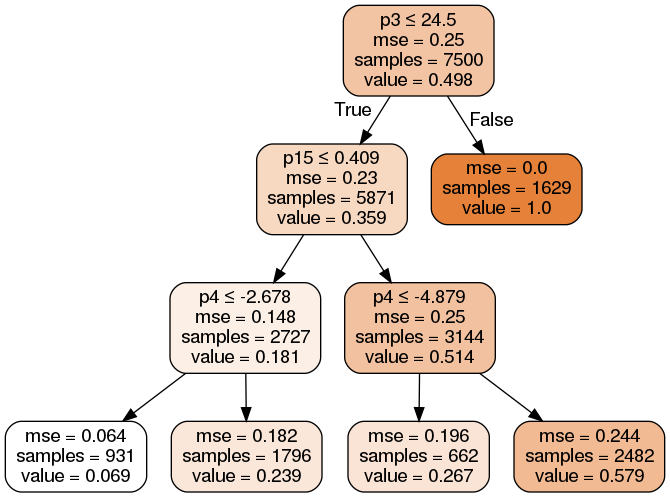

In [9]:
graphviz_options = {'filled': True, 'rounded': True, 'special_characters': True}
dot_data = sklearn.tree.export_graphviz(classifier, out_file=None, feature_names=original_training_data.columns[1:], class_names=['class 0', 'class 1'], **graphviz_options)  
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

# ROC

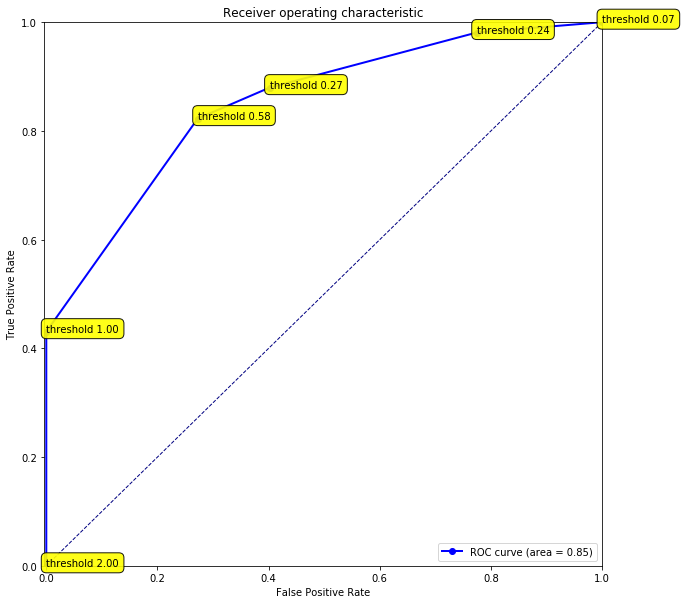

In [10]:
fprs, tprs, thrs = sklearn.metrics.roc_curve(test_y, pred_test_y)
roc_auc = sklearn.metrics.auc(fprs, tprs)

fig = plt.figure(figsize=(10, 10))
plt.plot(fprs, tprs, color='blue', marker='o', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.step(fprs, tprs, where='post', color='blue', marker='o', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([-0.004, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
for fpr, tpr, thr in zip(fprs, tprs, thrs):
    fig.axes[0].annotate('threshold %.2f' % thr, xy=[fpr, tpr], fontsize=10,
                        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.90))
plt.show()

# Predict validate set
gonna use threshold 0.5 - this should give us ~0.7 TPR and ~0.2 FPR

In [11]:
# impute missing
predict_data = original_predict_data.copy()
predict_data['p18'] = imputer_p18.transform(predict_data['p18'].values.reshape(-1, 1))
predict_data['p19'] = imputer_p19.transform(predict_data['p19'].values.reshape(-1, 1))

topred_p15_x = predict_data.loc[np.isnan(predict_data['p15']), [c for c in predict_data.columns if c != 'Target' and c != 'p15']].values
topred_p15_y_pred = classif_p15.predict(topred_p15_x)
predict_data.loc[np.isnan(predict_data['p15']), 'p15'] = topred_p15_y_pred

predict_threshold = 0.5
topred_x = predict_data.loc[:, 'p1':'p20'].values
predict_data['Target'] = (classifier.predict(topred_x) > predict_threshold).astype(int)

with pd.option_context('display.max_rows', 5):
    display(predict_data)

,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
Ind,,,,,,,,,,,,,,,,,,,,,
1,1,3.0,12,3,1.143,0,0,1,0.236,12,-1.854,30,23,4,12,0.448,0,0,0.800,0.250,429
2,1,7.0,12,10,1.949,1,0,1,0.630,15,-1.645,29,10,7,16,0.600,0,0,0.828,0.562,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,0,3.0,21,0,0.235,1,0,1,0.101,21,0.843,30,29,4,1,0.229,0,0,0.800,0.000,1709
5000,1,2.0,21,0,2.622,1,0,1,0.206,6,0.541,30,28,4,2,0.427,0,0,0.800,0.000,1475


## Sanity check

,Target,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.332800,16.289620,19.73280,12.683800,-4.565050,0.551000,0.00100,1.21960,0.339347,12.18300,-7.907650,28.296000,25.86420,14.798600,15.367800,0.425414,0.098400,1.220400,0.806100,0.911685,808.651600
std,0.471263,26.979379,5.66673,10.090995,75.379567,0.497442,0.03161,1.03111,0.248153,7.81146,21.157392,4.059714,6.08243,16.920677,11.331187,0.222217,0.297885,4.013458,0.481765,1.541961,1069.311869
min,0.000000,0.000000,0.00000,0.000000,-4952.961000,0.000000,0.00000,0.00000,0.030000,1.00000,-533.405000,0.000000,1.00000,0.000000,0.000000,0.041000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.355000,19.00000,0.000000,-7.970500,0.000000,0.00000,1.00000,0.140000,5.00000,-12.721750,29.000000,24.00000,6.000000,3.000000,0.237000,0.000000,0.000000,0.800000,0.143000,37.000000
50%,0.000000,10.000000,23.00000,14.000000,-0.249500,1.000000,0.00000,1.00000,0.269000,11.00000,-3.584000,30.000000,29.00000,10.000000,17.000000,0.385000,0.000000,0.000000,0.800000,0.800000,285.000000
75%,1.000000,20.000000,23.00000,24.000000,4.271750,1.000000,0.00000,2.00000,0.452000,20.00000,0.853250,30.000000,30.00000,18.000000,27.000000,0.631000,0.000000,0.000000,0.800000,1.000000,1413.000000
max,1.000000,1000.000000,23.00000,28.000000,205.845000,1.000000,1.00000,12.00000,0.980000,24.00000,209.631000,30.000000,31.00000,309.000000,30.000000,0.918000,1.000000,24.000000,24.000000,24.000000,6495.000000


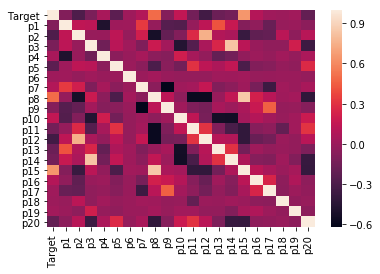

In [12]:
display(predict_data.describe())
sns.heatmap(predict_data.corr())

In [13]:
predict_data.to_csv('../outputs/task2.csv')